<a href="https://colab.research.google.com/github/LobaXgreecy/py/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.offline as py
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint as sp_randint
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

In [47]:
data = pd.read_csv('/content/diabetes.csv')


In [48]:
data.shape


(768, 9)

In [49]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


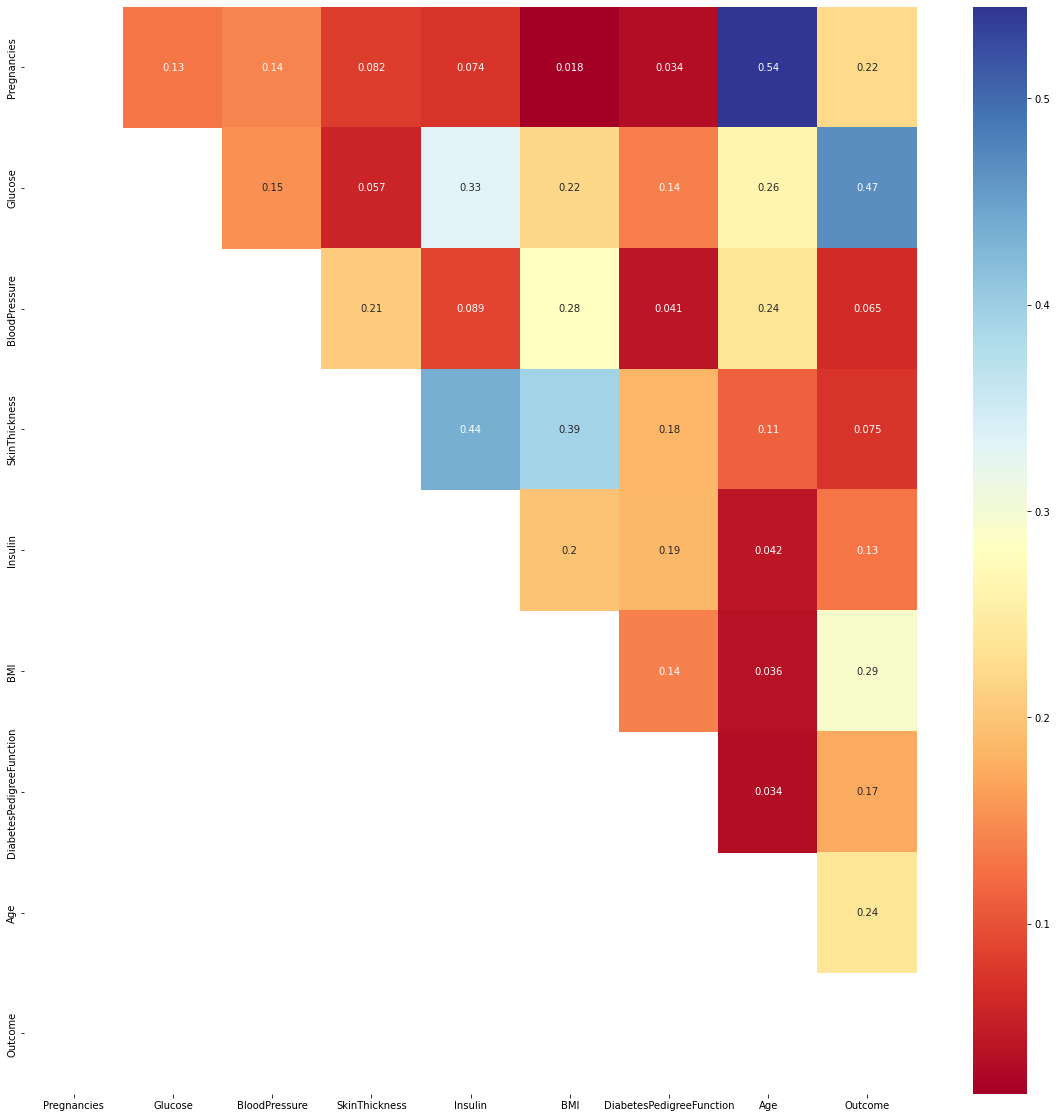

In [7]:
correlation = data.corr().abs()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='RdYlBu')

In [8]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
data_copy = data.copy(deep= True)
data_copy[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']] = data_copy[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']].replace(0,np.NaN)
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
data_copy[data_copy.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are 3 approaches to tackling missing values
1.Drop column
2.Imputation
3.Extended imputation:-Where the imputation made is reflected in the dataset


Here we use KNN method to fill the missing values

In [110]:
imputer  = KNNImputer(n_neighbors=2)
imputer.fit(data_copy)
data_copy[ : ] = imputer.transform(data_copy)

In [113]:
X = data.drop(['Outcome'] , axis=1)
y = data['Outcome']

In [23]:
normalize = preprocessing.StandardScaler()
norm_df = normalize.fit_transform(X)
X = pd.DataFrame(norm_df , index=X.index , columns = X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [89]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size= 0.2 , random_state= 42)

In [90]:
rfc = RandomForestClassifier()
rf_model = rfc.fit(X_train , y_train)

In [91]:
predictions = rf_model.predict(X_test)
accuracy_score(y_test , predictions)

0.7467532467532467

In [97]:
n_estimators = [100,200,300,400,500,600,800,1000]
max_features = ['sqrt' , 'log2', None]
max_depth = [2,3,4,5,6,7,8,9,10]
min_samples_split = sp_randint(2, 50)
bootstrap = [True ,False ]

In [93]:
param_test = {'bootstrap' : bootstrap ,
              'criterion' : ['gini' , 'entropy' , 'log_loss'],
              'n_estimators' : n_estimators, 
              'max_features' : max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split}
print(param_test)

{'bootstrap': ['True', 'False'], 'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 50]}


In [98]:
rfc = RandomForestClassifier(random_state= 42 ,n_jobs =1 )
grid_search = RandomizedSearchCV(
    estimator=rfc ,
    param_distributions = param_test ,
    n_iter =300,
    scoring ='roc_auc',
    cv = 5, 
    refit = True,
    random_state =42,
    verbose =True)
grid_search.fit(X_train ,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=42),
                   n_iter=300,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 800, 1000]},
                   random_state=42, scoring='roc_auc', verbose=True)

In [104]:
opt_params = grid_search.best_params_
opt_params

{'n_estimators': 300,
 'min_samples_split': 50,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': 'True'}

In [105]:
rfecv = RFECV(estimator = (GradientBoostingClassifier()))
rf_opt = RandomForestClassifier(**opt_params)
pipeline = Pipeline([('Feature Selection' , rfecv) , ('Model' , rf_opt)])
cv = RepeatedStratifiedKFold(n_splits =10 , n_repeats =10 ,random_state =42)
n_scores = cross_val_score(pipeline , X_train , y_train ,scoring = 'roc_auc' ,cv=5 ,n_jobs=1)
print(np.mean(n_scores))
pipeline.fit(X_train ,y_train)
print("optimal number of features : %d" % rfecv.n_features_)


0.8472891800992576
optimal number of features : 4


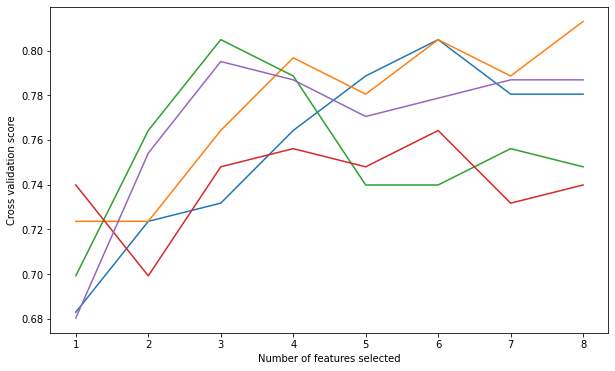

In [115]:
%matplotlib inline
plt.figure(figsize =(10 ,6 ))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [108]:
pred =pipeline.predict(X_test)
accuracy_score(y_test ,pred)

0.7467532467532467